# Question 1

## (a)

*Hint: use `seaborn.pairplot` to visualize data. use `np.corrcoef` to calculate the correlation matrix and use `seaborn.heatmap` to visualize the correlation matrix.*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/mac_1/Desktop/CHEM C142/compounds.csv")
df

,A,B,C,D,type,Start assignment
0,6.4,2.9,4.3,1.3,amide,1
1,5.7,4.4,1.5,0.4,phenol,2
2,6.7,3.0,5.2,2.3,ether,0
3,5.8,2.8,5.1,2.4,ether,1
4,6.4,3.2,5.3,2.3,ether,0
...,...,...,...,...,...,...
145,5.4,3.9,1.3,0.4,phenol,1
146,6.3,2.5,5.0,1.9,ether,0
147,6.0,3.4,4.5,1.6,amide,0
148,6.2,2.9,4.3,1.3,amide,0


In [3]:
newdf = df.drop(['Start assignment'], axis = 1)
newdf

,A,B,C,D,type
0,6.4,2.9,4.3,1.3,amide
1,5.7,4.4,1.5,0.4,phenol
2,6.7,3.0,5.2,2.3,ether
3,5.8,2.8,5.1,2.4,ether
4,6.4,3.2,5.3,2.3,ether
...,...,...,...,...,...
145,5.4,3.9,1.3,0.4,phenol
146,6.3,2.5,5.0,1.9,ether
147,6.0,3.4,4.5,1.6,amide
148,6.2,2.9,4.3,1.3,amide


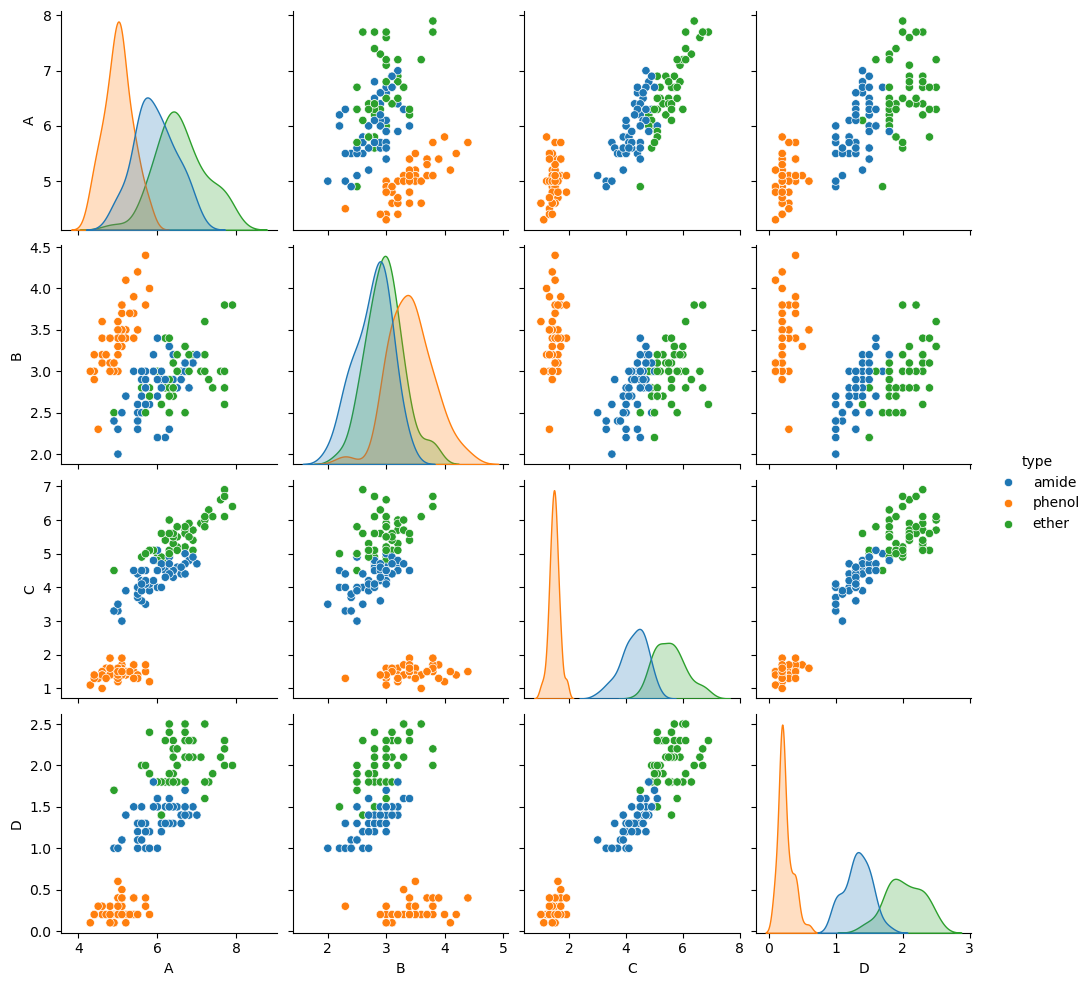

In [4]:
sns.pairplot(data = newdf, hue = 'type')

In [5]:
compounds = newdf.drop(['type'],axis = 1)
compounds

,A,B,C,D
0,6.4,2.9,4.3,1.3
1,5.7,4.4,1.5,0.4
2,6.7,3.0,5.2,2.3
3,5.8,2.8,5.1,2.4
4,6.4,3.2,5.3,2.3
...,...,...,...,...
145,5.4,3.9,1.3,0.4
146,6.3,2.5,5.0,1.9
147,6.0,3.4,4.5,1.6
148,6.2,2.9,4.3,1.3


In [6]:
scaler = MinMaxScaler()
data = scaler.fit_transform(compounds)
data

array([[0.58333333, 0.375     , 0.55932203, 0.5       ],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.66666667, 0.41666667, 0.71186441, 0.91666667],
       [0.41666667, 0.33333333, 0.69491525, 0.95833333],
       [0.58333333, 0.5       , 0.72881356, 0.91666667],
       [0.13888889, 0.41666667, 0.06779661, 0.08333333],
       [0.16666667, 0.20833333, 0.59322034, 0.66666667],
       [0.72222222, 0.45833333, 0.69491525, 0.91666667],
       [0.5       , 0.33333333, 0.62711864, 0.45833333],
       [0.61111111, 0.41666667, 0.71186441, 0.79166667],
       [0.61111111, 0.33333333, 0.61016949, 0.58333333],
       [0.91666667, 0.41666667, 0.94915254, 0.83333333],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.72222222, 0.5       , 0.79661017, 0.91666667],
       [0.11111111, 0.5       , 0.10169492, 0.04166667],
       [0.02777778, 0.41666667, 0.05084746, 0.04166667],
       [0.55555556, 0.375     , 0.77966102, 0.70833333],
       [0.77777778, 0.41666667,

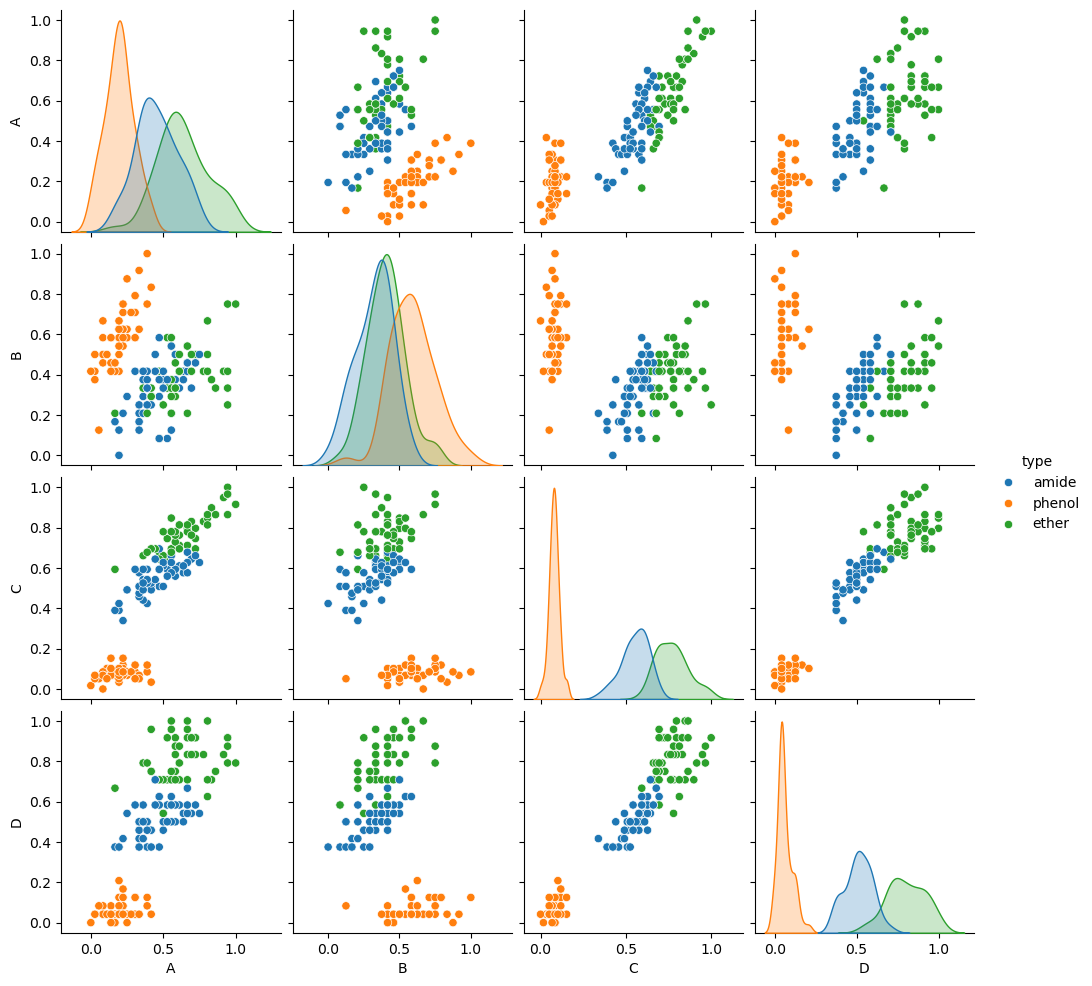

In [7]:
normalized_df = pd.DataFrame(data, columns = compounds.columns)
normalized_df['type'] = pd.Series(newdf['type'].values, index = normalized_df.index)
normalized_df
sns.pairplot(data = normalized_df, hue = 'type')

<AxesSubplot:>

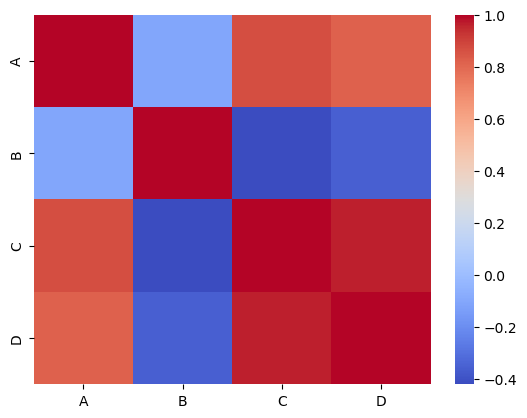

In [8]:
cormat = np.corrcoef(data.T)
cormat
sns.heatmap(cormat, cmap = 'coolwarm', xticklabels = compounds.columns, yticklabels = compounds.columns)

## (b)

### \[IMPORTANT\] Fill in and use the KMeans code below. DO NOT USE  `sklearn.cluster.KMeans`.

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters. Refer to Tutorial 5.*

In [9]:
import warnings
from scipy.spatial.distance import cdist


class KMeans():
    def __init__(self, n_clusters, max_iter=1000):
        self.k = n_clusters
        self.max_iter = max_iter
    
    def cluster(self, X):
        """
        Do K-Means clustering
        
        Parameters
        ----------
        X: np.ndarray
            Normalized input features, shape (n_samples, n_features)
        """
        centroids = np.random.random((self.k, X.shape[1]))
        assignments = np.zeros(X.shape[0])
        new_assignments = self.create_new_assignments(centroids, X)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        if len(np.unique(new_assignments)) < self.k:
            return self.cluster(X)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.max_iter:
            # compute centroids
    
    
            centroids = np.array([X[new_assignments == k].mean(axis=0) for k in range(self.k)])

            
            assignments = new_assignments
            # call the self.create_new_assignments
            new_assignments = self.create_new_assignments(centroids, X)
            if len(np.unique(new_assignments)) < self.k:
                warnings.warn('Warning: At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.max_iter:
                warnings.warn("Warning: Maximum number of iterations reached!")
        return new_assignments, centroids
            
        
    def create_new_assignments(self, centroids, X):
        """
        Assign each datapoint to its nearest centroid.
        
        Parameters
        ----------
        centroids: np.ndarray
            Centroid of each cluster, shape (n_clusters, n_features)
        X: np.ndarray
            Input features, shape (n_samples, n_features)
        
        Returns
        ------
        new_assignments: np.ndarray
            Index of cluster which each data point belongs to, shape (n_samples,)
        """
        # Compute the distances that stores the Eucledian distances between each datapoints and the centroid
        # shape (n_samples, n_clusters)
        # Hint: you can use cdist in scipy.spatial.distance. 
        # cdist doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
        distances = cdist(X, centroids, 'euclidean')
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments

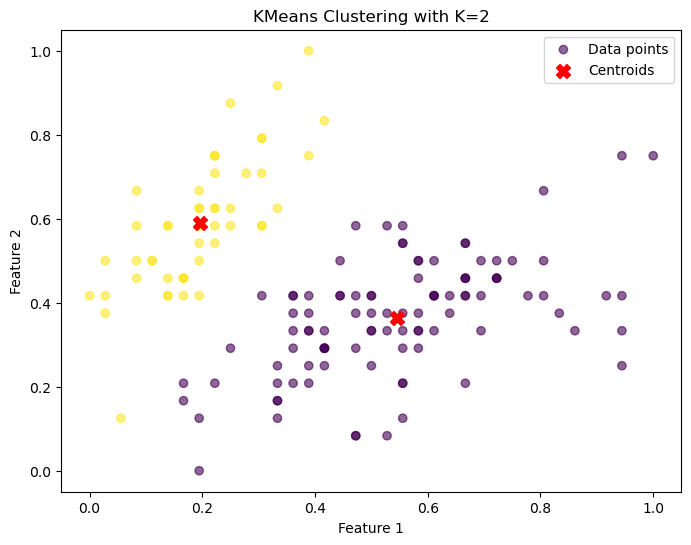

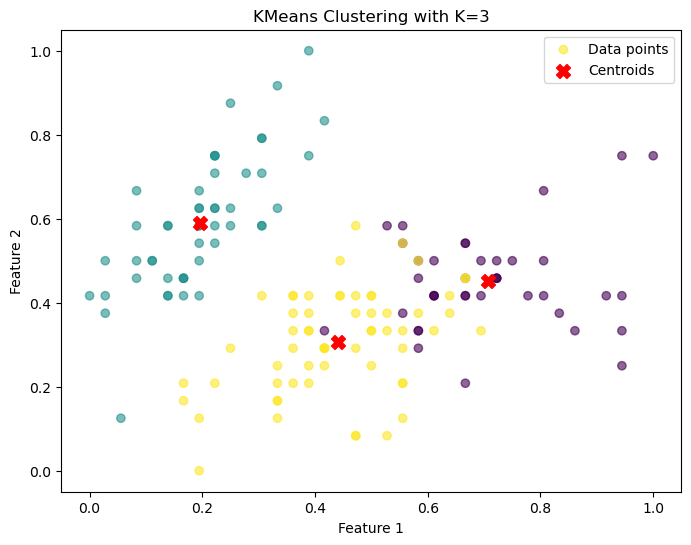

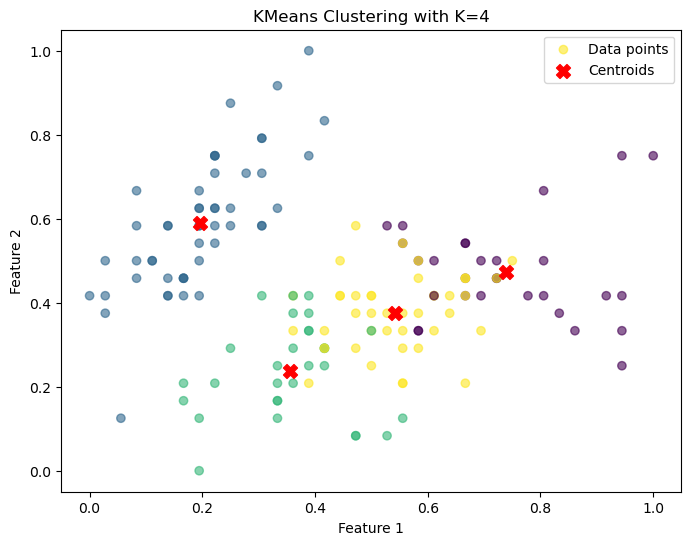

In [10]:
k_values = [2, 3, 4]
cluster_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    assignments, centroids = kmeans.cluster(data)
    cluster_results[k] = (assignments, centroids)



for k, (assignments, centroids) in cluster_results.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', marker='o', alpha=0.6, label='Data points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
    plt.title(f'KMeans Clustering with K={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


/var/folders/d9/6wjn536x21n4fgb_hwj80bx80000gp/T/ipykernel_86398/25061822.py:40: UserWarning: Warning: At least one centroid vanishes
  warnings.warn('Warning: At least one centroid vanishes')
/var/folders/d9/6wjn536x21n4fgb_hwj80bx80000gp/T/ipykernel_86398/25061822.py:33: RuntimeWarning: Mean of empty slice.
  centroids = np.array([X[new_assignments == k].mean(axis=0) for k in range(self.k)])
/Users/mac_1/opt/anaconda3/envs/c142/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/d9/6wjn536x21n4fgb_hwj80bx80000gp/T/ipykernel_86398/25061822.py:43: UserWarning: Warning: Maximum number of iterations reached!
  warnings.warn("Warning: Maximum number of iterations reached!")


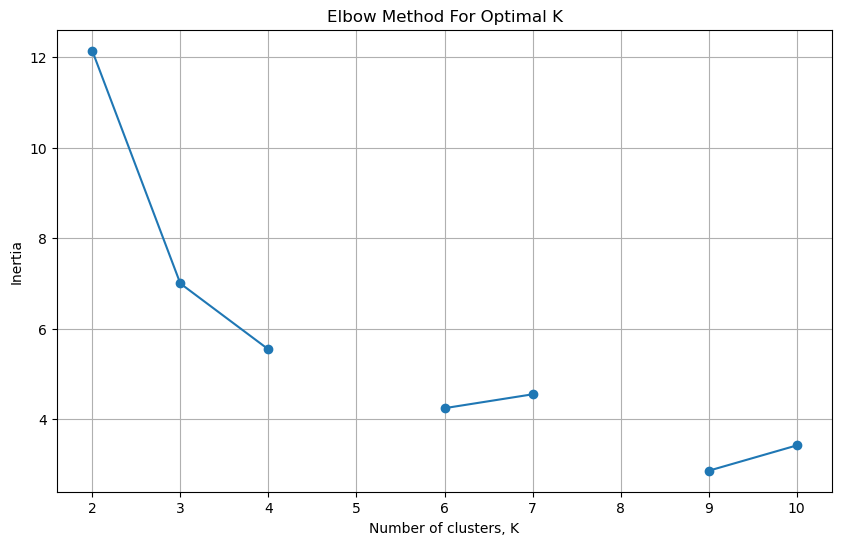

In [11]:
inertias = []

for k in range(2, 11):  # Example range, adjust according to your needs
    kmeans = KMeans(n_clusters=k)
    _, centroids = kmeans.cluster(data)  # Use your KMeans implementation
    
    # Calculate inertia (sum of squared distances to nearest cluster center)
    distances = cdist(data, centroids, 'euclidean')
    min_distances = np.min(distances, axis=1)
    inertia = sum(min_distances**2)
    
    inertias.append(inertia)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


Considering the result of elbow method, K = 3 seems to be the most promising. 

## (c)

### [IMPORTANT] Use the following function to validate your result. See the example in the docstring for usage.

*For debuuging: you will get output like (not the same as) this*:

```
Class 0 - amide: 48 out of 50 are classified correctly
Class 1 - ether: 46 out of 50 are classified correctly
Class 2 - phenol: 50 out of 50 are classified correctly
```

In [12]:
def validate(y_pred, y_true):
    """
    Validate the results of clustering
    
    Parameters
    ---------
    y_pred: np.ndarray
        Predicted clusters
    y_true: list or np.ndarray
        Ground truth clusters
    
    Example
    ------
    >>> validate(model.cluster(features), df['type'].values)
    """
    # correct classification
    compounds = np.unique(y_true) # should be ['amide','phenol','ether'] for compounds dataset
    clusters = [np.where(y_true == c)[0] for c in compounds]
    pred_class = np.unique(y_pred)
    
    #remove -1 for noise point in DBSCAN
    pred_class = np.delete(pred_class, np.where(pred_class == -1))
    assert len(pred_class) == len(compounds), \
        f'Predicted clusters has less or more than {len(compounds)} classes: {pred_class}'
    for i in range(3):
        #loop over solutions
        counts = []
        scores = []
        for j in range(3):
            # loop over clusters of true assignments
            sol_i = np.where(y_pred == pred_class[i])[0]
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1] / len(clusters[j]))
        idx = np.argmax(scores)
        print(
            f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out of {len(clusters[j])}'
            ' are classified correctly'
        ) 

In [13]:
kmeans = KMeans(n_clusters=3)
validate(kmeans.cluster(data)[0], df['type'].values)

Class 0 - phenol: 50 out of 50 are classified correctly
Class 1 - amide: 47 out of 50 are classified correctly
Class 2 - ether: 36 out of 50 are classified correctly


## (d)

In [14]:
ntrials = 100
count = 0
for i in range(ntrials):
    kmeans = KMeans(n_clusters=4) # Comment out the re-init code in KMeans
    results = kmeans.cluster(data)[0]
    if len(np.unique(results)) == 4:
        count += 1
print(f'Out of {ntrials} number of KMeans trials, only {count} gives 4 clusters')

/var/folders/d9/6wjn536x21n4fgb_hwj80bx80000gp/T/ipykernel_86398/25061822.py:40: UserWarning: Warning: At least one centroid vanishes
  warnings.warn('Warning: At least one centroid vanishes')
/var/folders/d9/6wjn536x21n4fgb_hwj80bx80000gp/T/ipykernel_86398/25061822.py:33: RuntimeWarning: Mean of empty slice.
  centroids = np.array([X[new_assignments == k].mean(axis=0) for k in range(self.k)])
/var/folders/d9/6wjn536x21n4fgb_hwj80bx80000gp/T/ipykernel_86398/25061822.py:43: UserWarning: Warning: Maximum number of iterations reached!
  warnings.warn("Warning: Maximum number of iterations reached!")


Out of 100 number of KMeans trials, only 99 gives 4 clusters


# Question 2

## (a)

*Hint*:
+ Use `sklearn.cluster.DBSCAN` and adjust `eps`(Rcut) and `min_samples`(MinPts) parameters.**
+ Core points are stored in `core_sample_indices_` attribute.
+ Cluster results are stored in `labels_` attribute and noise points are labeled as -1.


In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=6)
db.fit(data)
core_points = db.core_sample_indices_
labels = db.labels_
unique_labels = set(db.labels_)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Assuming 'db' is your fitted DBSCAN instance
is_core = np.zeros_like(db.labels_, dtype=bool)
is_core[db.core_sample_indices_] = True


print(f'Estimated number of clusters: {n_clusters}')

# Core points
core_points = db.core_sample_indices_
num_core_points = len(core_points)

# Noise points
num_noise_points = sum(labels == -1)

# Border points are those that are not core but are in a cluster (label != -1)
border_points_mask = ~(np.isin(range(len(labels)), core_points)) & (labels != -1)
num_border_points = sum(border_points_mask)

print(f"Core Points: {num_core_points}")
print(f"Border Points: {num_border_points}")
print(f"Noise Points: {num_noise_points}")

Estimated number of clusters: 3
Core Points: 37
Border Points: 25
Noise Points: 88


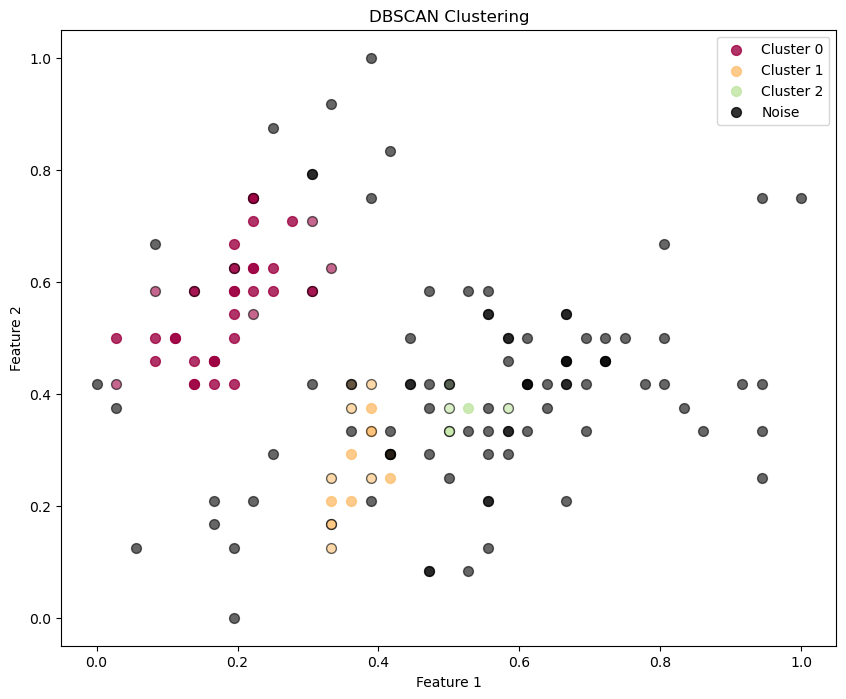

In [16]:
plt.figure(figsize=(10, 8))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color for noise
        col = [0, 0, 0, 1]

    # Create a mask for members of cluster k
    class_member_mask = (labels == k)

    # Plot core points for cluster k
    xy = data[class_member_mask & is_core]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.8, label=f'Cluster {k}' if k != -1 else 'Noise')

    # Plot non-core points for cluster k
    xy = data[class_member_mask & ~is_core]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', edgecolors='k', alpha=0.6)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()


In [17]:
validate(db.labels_,df['type'].values)

Class 0 - phenol: 39 out of 50 are classified correctly
Class 1 - amide: 17 out of 50 are classified correctly
Class 2 - amide: 6 out of 50 are classified correctly


KMeans method is more effective than DBSCAN method for classifying the given data.

## (b)

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters. Refer to Tutorial 5.*

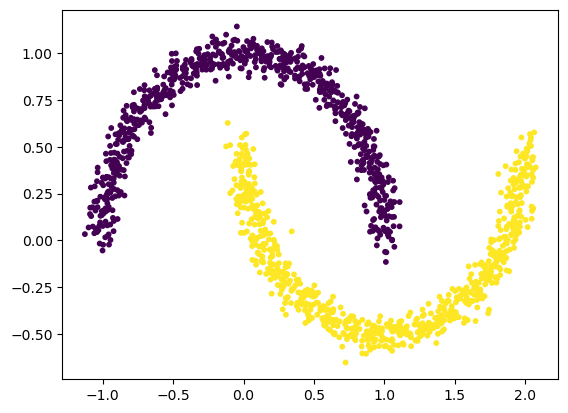

In [18]:
from sklearn import datasets

def moon_dataset(n_samples=1500):
    """
    Generate datasets. We choose the size big enough to see the scalability
    of the algorithms, but not too big to avoid too long running times
    
    Parameters
    ---------
    n_samples: int
        Number of data points
    
    Returns
    ------
    X: np.ndarray
        Data points, shape (n_samples, 2)
    y: np.ndarray
        Clusters that each point belongs to, shape (n_samples)
    """
    np.random.seed(0)
    n_samples = 1500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
    X, y = noisy_moons
    return X, y

X, y = moon_dataset()
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

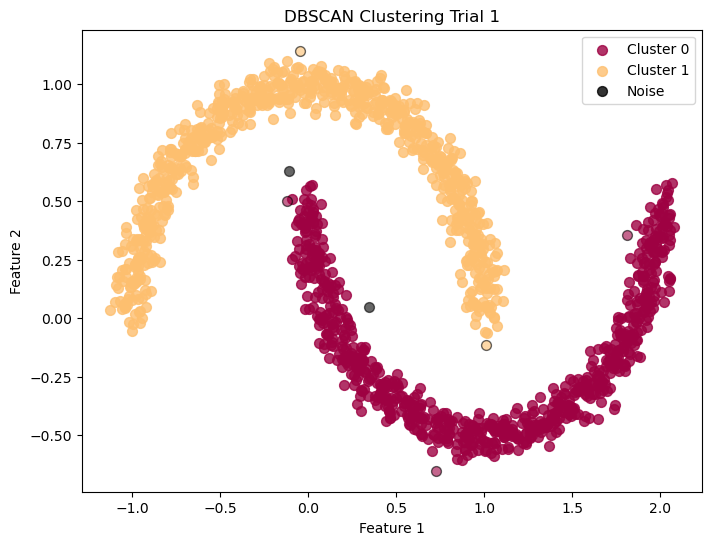

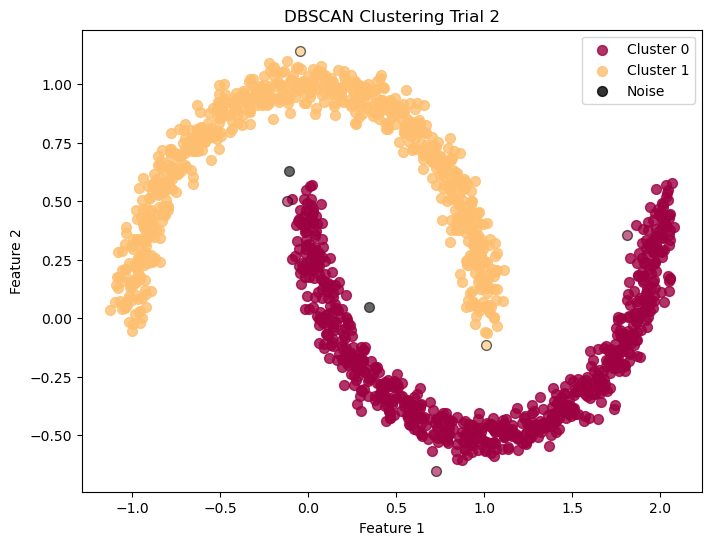

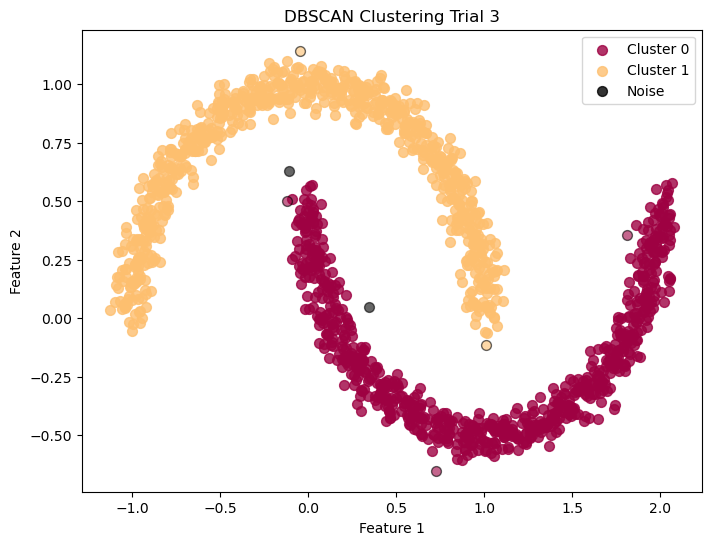

In [19]:
for i in range(3):
    db = DBSCAN(eps=0.1, min_samples=6)
    db.fit(X)

    core_points = np.zeros_like(db.labels_, dtype=bool)
    core_points[db.core_sample_indices_] = True

    plt.figure(figsize=(8, 6))
    unique_labels = set(db.labels_)
    for k in unique_labels:
        col = 'k' if k == -1 else plt.cm.Spectral(k / len(unique_labels))
        class_member_mask = (db.labels_ == k)

        xy = X[class_member_mask & core_points]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.8, label=f'Cluster {k}' if k != -1 else 'Noise')

        xy = X[class_member_mask & ~core_points]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', edgecolors='k', alpha=0.6)

    plt.title(f'DBSCAN Clustering Trial {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='best')
    plt.show()

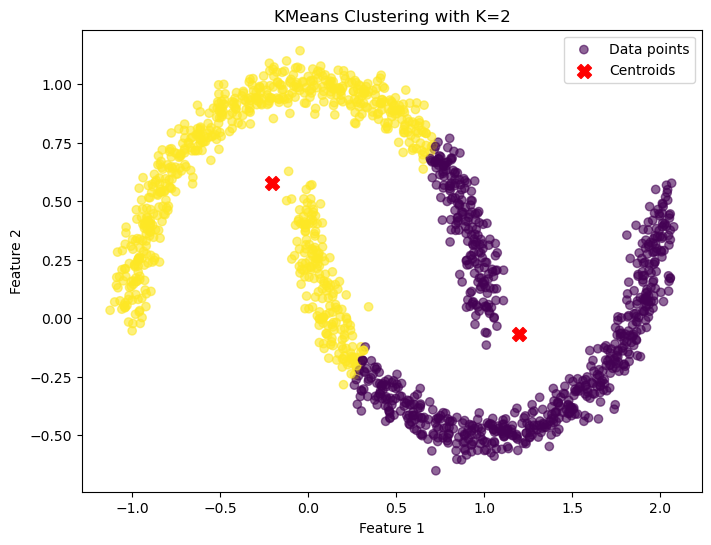

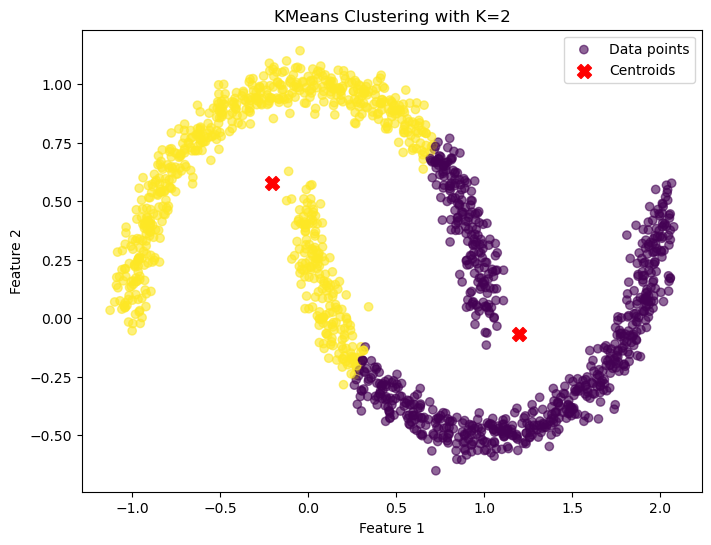

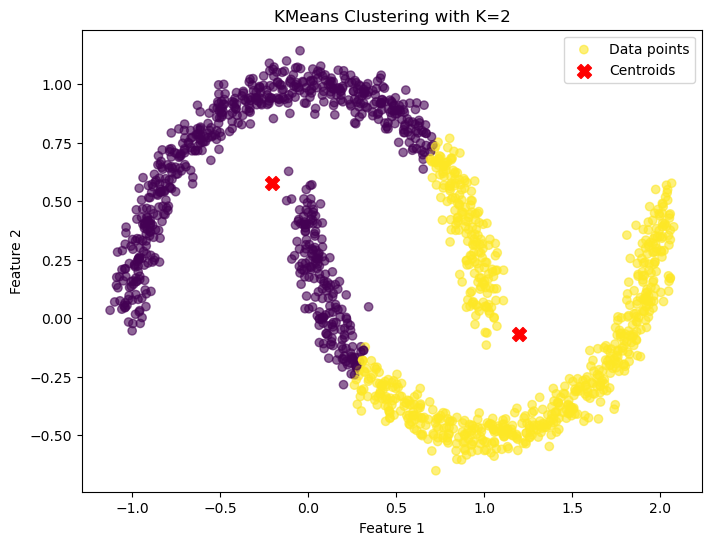

In [20]:
for i in range(3):
    kmeans = KMeans(n_clusters=2)
    assignments, centroids = kmeans.cluster(X)
    cluster_results = (assignments, centroids)


    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=assignments, cmap='viridis', marker='o', alpha=0.6, label='Data points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
    plt.title(f'KMeans Clustering with K=2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()    

DBSCAN method works better than K-means method for the given data.

# Question 3

## (a)

In [21]:
newdf

,A,B,C,D,type
0,6.4,2.9,4.3,1.3,amide
1,5.7,4.4,1.5,0.4,phenol
2,6.7,3.0,5.2,2.3,ether
3,5.8,2.8,5.1,2.4,ether
4,6.4,3.2,5.3,2.3,ether
...,...,...,...,...,...
145,5.4,3.9,1.3,0.4,phenol
146,6.3,2.5,5.0,1.9,ether
147,6.0,3.4,4.5,1.6,amide
148,6.2,2.9,4.3,1.3,amide


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(compounds)
data
normalized_df = pd.DataFrame(data, columns = compounds.columns)
#normalized_df['type'] = pd.Series(newdf['type'].values, index = normalized_df.index)
normalized_df['Start assignment'] = pd.Series(df['Start assignment'].values, index = normalized_df.index)
normalized_df

,A,B,C,D,Start assignment
0,0.674501,-0.356361,0.307833,0.133226,1
1,-0.173674,3.114684,-1.284407,-1.050031,2
2,1.038005,-0.124958,0.819624,1.447956,0
3,-0.052506,-0.587764,0.762759,1.579429,1
4,0.674501,0.337848,0.876490,1.447956,0
...,...,...,...,...,...
145,-0.537178,1.957669,-1.398138,-1.050031,1
146,0.553333,-1.281972,0.705893,0.922064,0
147,0.189830,0.800654,0.421564,0.527645,0
148,0.432165,-0.356361,0.307833,0.133226,0


## (b)

In [23]:
cluster_1 = normalized_df[normalized_df['Start assignment'] == 0]
cluster_2 = normalized_df[normalized_df['Start assignment'] == 1]
cluster_3 = normalized_df[normalized_df['Start assignment'] == 2]

# Step 2: Calculate the mean of each variable for each cluster
centroid_1 = cluster_1.mean(axis=0)
centroid_2 = cluster_2.mean(axis=0)
centroid_3 = cluster_3.mean(axis=0)

centroids_df = pd.DataFrame([centroid_1, centroid_2, centroid_3], columns=normalized_df.columns)
centroids_df

,A,B,C,D,Start assignment
0,-0.033119,-0.055537,-0.008340,0.038565,0.0
1,0.109859,0.041653,0.104254,0.091155,1.0
2,-0.076740,0.013884,-0.095913,-0.129720,2.0


## (c)

*For debugging: should be 596.4585801741025*

In [24]:
import numpy as np
import numba

@numba.njit()
def cost_func(features, centroids, clusters):
    """
    Parameters
    ----------
    features: np.ndarray
        Feature matrix, shape (n_samples, n_features). In the compound dataset, n_features = 4.
    centroids: np.ndarray
        Centroids of each cluster, shape (n_cluster, n_features). In this question, n_cluster = 3.
    clusters: np.ndarray
        Cluster which each datapoint belongs to. shape (n_samples,)
    """
    #print("Shape of features array:", features.shape)
    #print("Shape of centroids array:", centroids.shape)
    #print("Shape of clusters array:", clusters.shape)
    #print("Unique cluster assignments:", np.unique(clusters))
    
    cost = 0
    
    for i in np.unique(clusters):
        mask = clusters == i
        cost += np.sum((features[mask] - centroids[i]) ** 2)
    return cost

features = normalized_df.drop(['Start assignment'], axis=1).to_numpy()
clusters = normalized_df['Start assignment'].to_numpy()
centroids = centroids_df.drop(['Start assignment'], axis=1).to_numpy()

cost_func(features, centroids, clusters)

596.4585801741025

## (d)

*For debugging*: 
+ Cooling schedule should be like: `array([500. , 499.5, 499.0005, ..., 3.37065784, 3.36728719, 3.3639199])`
+ Cost function can drop to around 540 (or even smaller).

In [25]:
import random

def SA(features, cluster, schedule, report_interval=100):
    """
    Simulated Annealing for clustering
    
    Parameters
    ----------
    features: numpy.ndarray
        Feature matrix. shape (n_samples, n_features)
    cluster: numpy.ndarray
        Initial guess of clusters. shape (n_samples,)
    schedule: numpy.ndarray
        Cooling schedule.
    report_interval: int
        Interval of steps to report result
    
    Returns
    ------
    res: dict
        Result containing the best clustering with the cost function value
    """
    
    centroids = np.array([np.mean(features[cluster == i], axis=0) for i in range(3)])
    cluster_eval = cost_func(features, centroids, cluster)
    
    best_cluster = cluster.copy()
    lowest_eval = cluster_eval

    for step, temp in enumerate(schedule):
        if step % report_interval == 0:
            print(step, temp, lowest_eval)
        for n in range(features.shape[0]):
            trial = cluster.copy()
            choices = [0, 1, 2]
            choices.remove(trial[n])
            rand_choice = random.sample(choices, 1)[0]
            trial[n] = rand_choice
            
            trial_centroids = np.array([np.mean(features[trial == i], axis=0) for i in range(3)])
            trial_eval = cost_func(features, trial_centroids, trial)
            if np.exp(-(cluster_eval - trial_eval) / temp) >= np.random.random():
                cluster = trial
                cluster_eval = trial_eval
                if trial_eval < lowest_eval:
                    best_cluster = cluster.copy()
                    lowest_eval = cluster_eval
                    
    return {"solution": best_cluster, "evaluation": lowest_eval}

In [26]:
def geometric_cooling(init_temp, num_steps, alpha):
    return [init_temp * (alpha ** t) for t in range(num_steps)]

# Parameters
init_temp = 500
num_steps = 5000
alpha = 0.999
schedule = geometric_cooling(init_temp, num_steps, alpha)

In [27]:
features = normalized_df.drop(['Start assignment'], axis=1).to_numpy()
initial_cluster = normalized_df['Start assignment'].to_numpy()

In [28]:
df['type']

0       amide
1      phenol
2       ether
3       ether
4       ether
        ...  
145    phenol
146     ether
147     amide
148     amide
149     amide
Name: type, Length: 150, dtype: object

In [29]:
for i in range(3):
    print(f"## Trial {i} ##")
    res = SA(features, initial_cluster, schedule)
    validate(res['solution'], df['type'])

## Trial 0 ##
0 500.0 596.4585801741025
100 452.39607355685445 544.2582041211481
200 409.3244147393178 536.101206253353
300 370.3535160780496 536.101206253353
400 335.09295300337004 536.101206253353
500 303.18947243059233 536.101206253353
600 274.32345374274837 536.101206253353
700 248.20570671554947 536.101206253353
800 224.57457430503754 536.101206253353
900 203.1933112726021 536.101206253353
1000 183.84771238548186 536.101206253353
1100 166.34396643120374 536.101206253353
1200 150.50671454669956 536.101206253353
1300 136.17729340973838 536.101206253353
1400 123.21214569233075 536.101206253353
1500 111.48138185145105 536.101206253353
1600 100.86747884857766 536.101206253353
1700 91.26410276135121 536.101206253353
1800 82.57504349184913 536.101206253353
1900 74.71325089899808 536.101206253353
2000 67.59996269874972 536.101206253353
2100 61.163915395008395 536.101206253353
2200 55.34063033613088 536.101206253353
2300 50.071767744453915 536.101206253353
2400 45.30454224728342 536.101206

KMeans method shows better classification then SA method.